## Figure 1 (a-f): 
## Oil transfer graphics for MEOAPAR ASM 2022 poster
Use `analysis-rachael/env/monte_carlo.yaml` to create an environment for this notebook:
```
 conda env create -f [analysis-rachael/env/monte_carlo.yaml]
```
or, to activate this environment, use
```
 conda activate monte-carlo
```
To deactivate an active environment, use
```
 conda deactivate
```

This notebook relies on functions in `monte_carlo_utils.py`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pathlib
import yaml
import sys
# load my function(s)
#sys.path.insert(0, '../../../scripts')
from monte_carlo_utils import get_DOE_quantity_byfac
# predefined naming conventions
import MEOPAR2022_setup as oil
# graphics style
plt.style.use(r"./meopar2022_matplotlibrc.template")
# conversion factor
gal2liter = 3.78541

In [2]:
# User inputs
yaml_input = pathlib.Path('/data/MIDOSS/marine_transport_data/')
yaml_output = pathlib.Path('/ocean/rmueller/MIDOSS/tmp_output')
graphics_directory = pathlib.Path(
    '/ocean/rmueller/MIDOSS/graphics/MEOPAR_ASM_2022'
)

# open oil_attribution.yaml for paths
oil_attribution_file = yaml_input / 'oil_attribution.yaml'
with open(oil_attribution_file) as file:
            oil_attrs = yaml.load(file, Loader=yaml.Loader)  

In [3]:
# define vessel and oil types to include in .yaml file
vessel_types = ['atb', 'barge', 'tanker']
oil_types    = oil.types
data_types    = ['total_gallons', 'fraction_of_total', 'number_of_transfers']

In [4]:
[exports, imports, combined]=get_DOE_quantity_byfac(
    oil_attrs['files']['doe_transfers'], 
    oil_attrs['files']['oil_facilities'],  
    facilities='selected'
)

get_DOE_quantity_byfac: not yet tested with fac_xls as input
Tallying atb quantities
Tallying barge quantities
Tallying tanker quantities


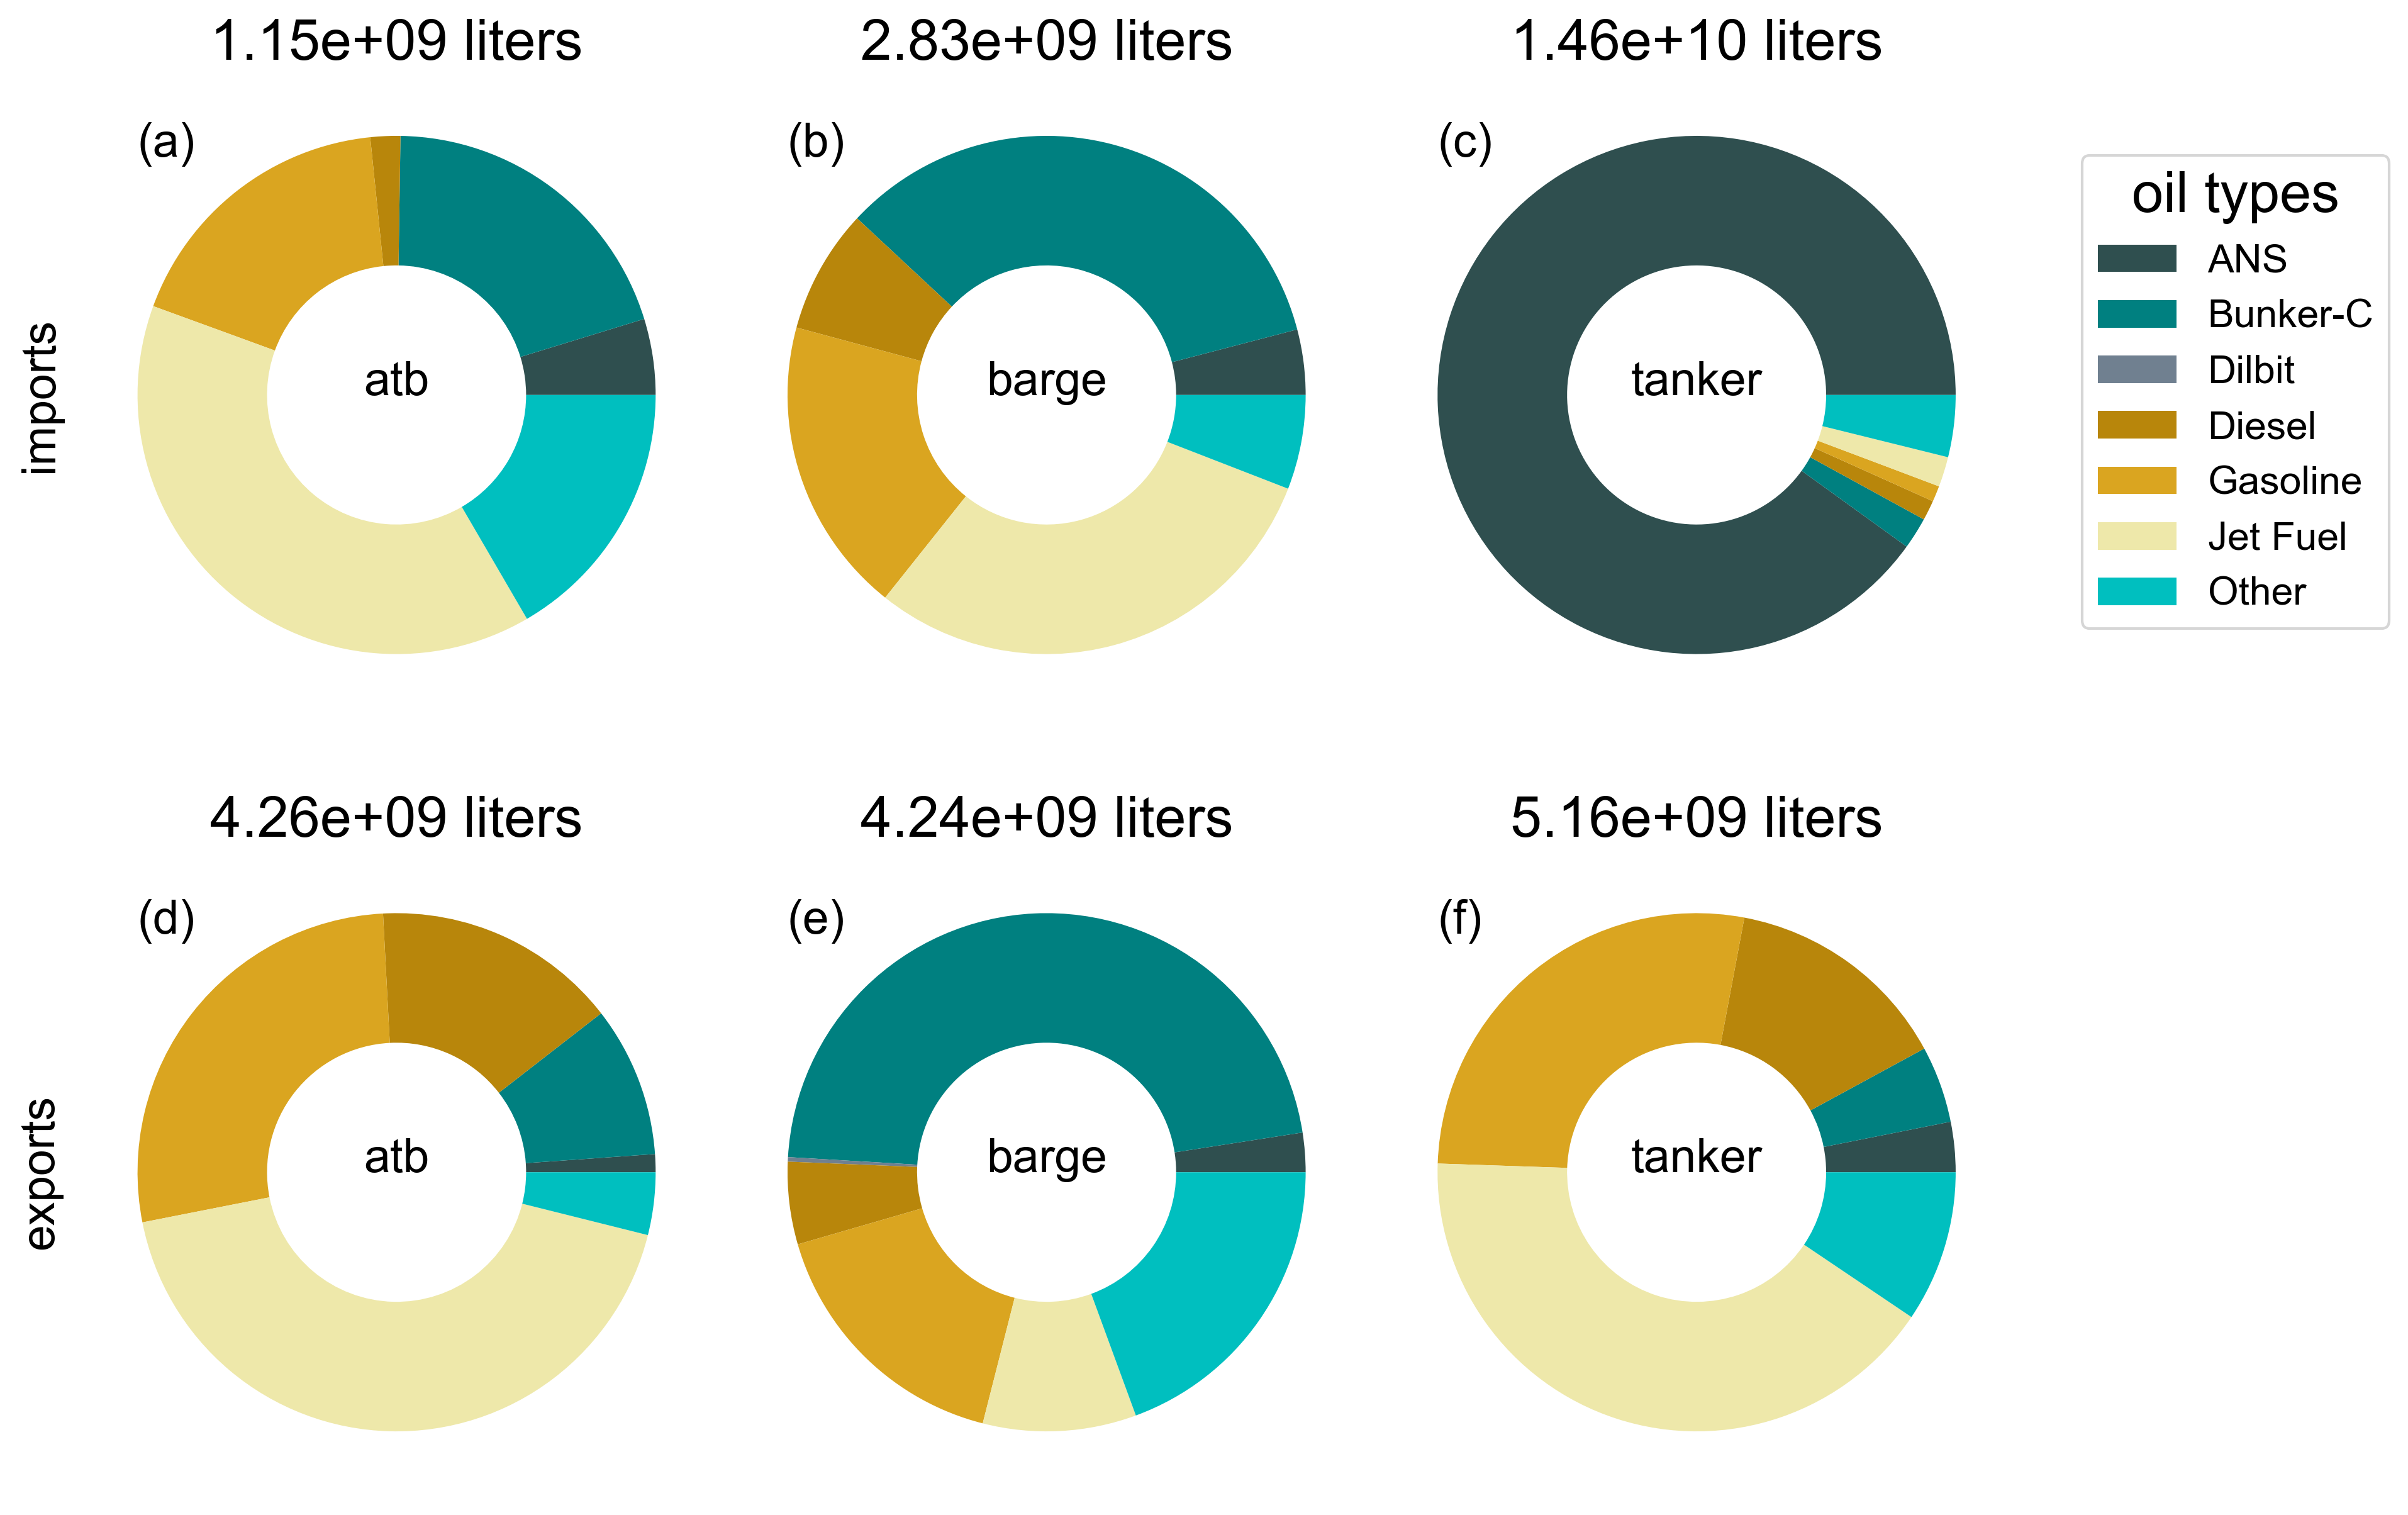

In [5]:
nc=3 #number of columns
fig = plt.figure() 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(10)
# set width of each subplot as 8
fig.set_figwidth(20)
fig.tight_layout
# create grid for different subplots
spec = gridspec.GridSpec(ncols=nc, nrows=2,wspace=-.6,
                         hspace=0.2,width_ratios=np.ones(nc),
                         height_ratios=[1,1])
ax={}
for ind in np.arange(nc*2):
    ax[ind] = fig.add_subplot(spec[ind])

plt.rcParams['axes.titlepad'] = -18  # pad is in points...

for j,vessel in enumerate(vessel_types):
            
    ax[j].axis('tight')
    ax[j+nc].axis('tight')
    
    # create array of total oil volume by oil type for each vessel at each facility
    plot_imports=np.array([v for v in imports[vessel].values()])
    plot_exports=np.array([v for v in exports[vessel].values()])
    # imports
    ax[j].pie(
        plot_imports, 
        wedgeprops=dict(width=0.5), 
        labels = None,
        colors=oil.colors7
    )
    # exports
    ax[j+nc].pie(
        plot_exports, 
        wedgeprops=dict(width=0.5), 
        labels = None,
        colors=oil.colors7
    )
    
    vessel = vessel_types[j]
    ax[j].set_title(f'{gal2liter*plot_imports.sum():4.2e} liters')
    ax[j+nc].set_title(f'{gal2liter*plot_exports.sum():4.2e} liters')
    ax[j].text(0,0,vessel,ha='center')
    ax[j+nc].text(0,0,vessel,ha='center')
           
ax[0].set_ylabel('imports')
ax[nc].set_ylabel('exports')
ax[0].text(-1,0.92,'(a)')
ax[1].text(-1,0.92,'(b)')
ax[2].text(-1,0.92,'(c)')
ax[nc].text(-1,0.92,'(d)')
ax[nc+1].text(-1,0.92,'(e)')
ax[nc+2].text(-1,0.92,'(f)')
ax[2].legend(
    bbox_to_anchor=(1.6, 0.9),
    title='oil types',
    labels = oil.labels
)
plt.savefig(graphics_directory/'Figure_1a-f_MEOPAR_ASM_2022.png')